In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from util.df_concat import concat
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

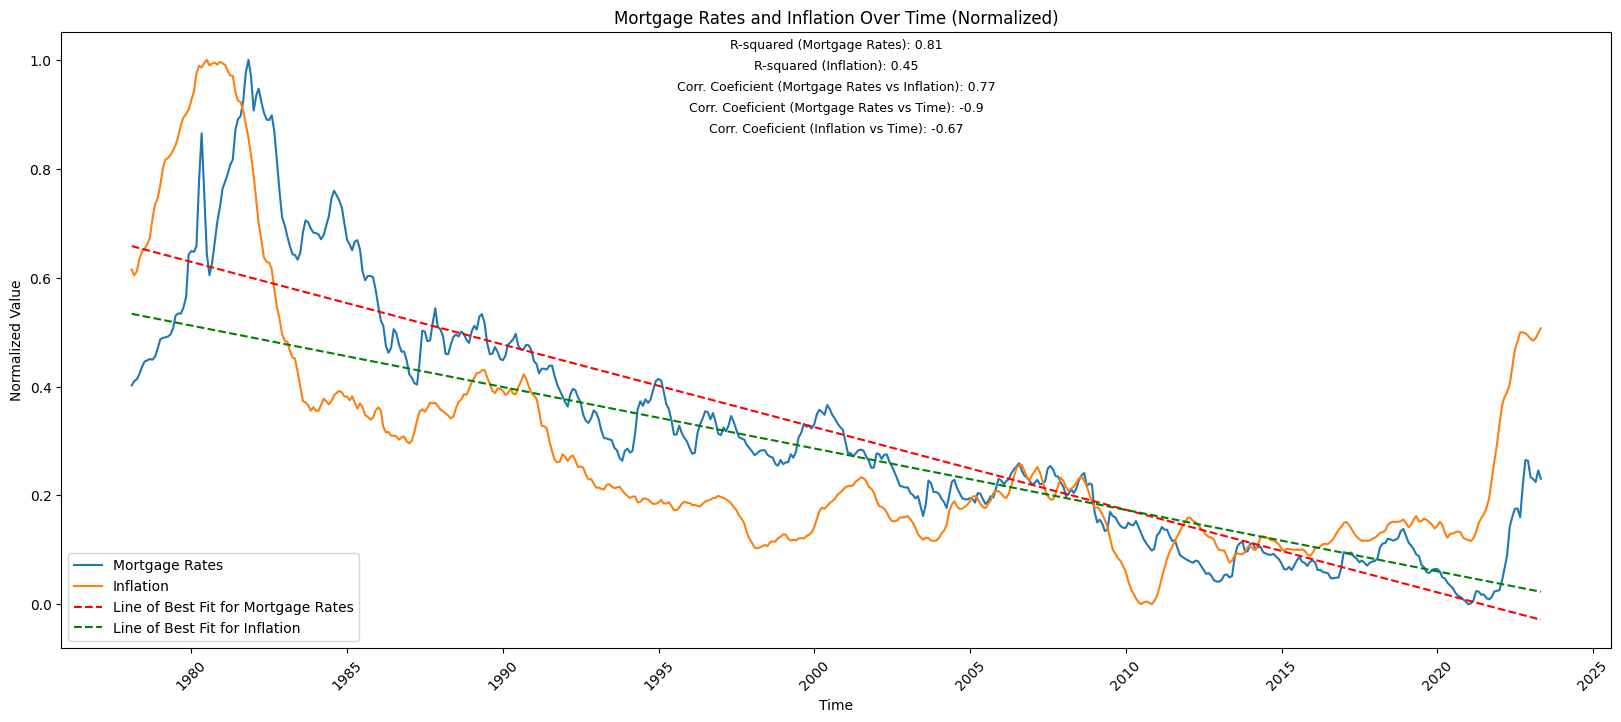

In [15]:
info = concat(
    './data/raw/PCETRIM12M159SFRBDAL.csv',
    './data/raw/MORTGAGE30US.csv')

# Convert the index to pandas datetime
info.index = pd.to_datetime(info.index)

# Resample to monthly frequency and interpolate to fill missing values
info = info.resample('M').mean().interpolate()

info.head().to_clipboard()

# Extract relevant columns
morgage_rates = info['MORTGAGE30US']
inflation = info['PCETRIM12M159SFRBDAL']
dates = info.index

# Min-max normalization
morgage_rates = (morgage_rates - morgage_rates.min()) / (morgage_rates.max() - morgage_rates.min())
inflation = (inflation - inflation.min()) / (inflation.max() - inflation.min())

# Line of best fit
x = np.arange(len(morgage_rates))
z1 = np.polyfit(x, morgage_rates, 1)
z2 = np.polyfit(x, inflation, 1)

p1 = np.poly1d(z1)
p2 = np.poly1d(z2)

# Plotting
plt.plot(dates, morgage_rates, label='Mortgage Rates')
plt.plot(dates, inflation, label='Inflation')
plt.plot(dates, p1(x), "r--", label='Line of Best Fit for Mortgage Rates')
plt.plot(dates, p2(x), "g--", label='Line of Best Fit for Inflation')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.title('Mortgage Rates and Inflation Over Time (Normalized)')
plt.legend(loc='lower left')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=45)

# Calculate and display coefficients on the plot
r_squared_morgage_rates = round(np.corrcoef(x, morgage_rates)[0, 1] ** 2, 2)
r_squared_inflation = round(np.corrcoef(x, inflation)[0, 1] ** 2, 2)
pearson_corr = round(morgage_rates.corr(inflation), 2)
pearson_corr_mortgage_time = round(np.corrcoef(x, morgage_rates)[0, 1], 2)
pearson_corr_inflation_time = round(np.corrcoef(x, inflation)[0, 1], 2)

# Display text on plot
annotations = [
    f'R-squared (Mortgage Rates): {r_squared_morgage_rates}',
    f'R-squared (Inflation): {r_squared_inflation}',
    f'Corr. Coeficient (Mortgage Rates vs Inflation): {pearson_corr}',
    f'Corr. Coeficient (Mortgage Rates vs Time): {pearson_corr_mortgage_time}',
    f'Corr. Coeficient (Inflation vs Time): {pearson_corr_inflation_time}'
]

# Using annotation to display centered text at the top of the plot
for i, annotation in enumerate(annotations):
    plt.annotate(annotation, xy=(0.5, 1), xytext=(0, -5 - 15 * i), fontsize=9,
                 xycoords='axes fraction', textcoords='offset points',
                 ha='center', va='top')

plt.show()

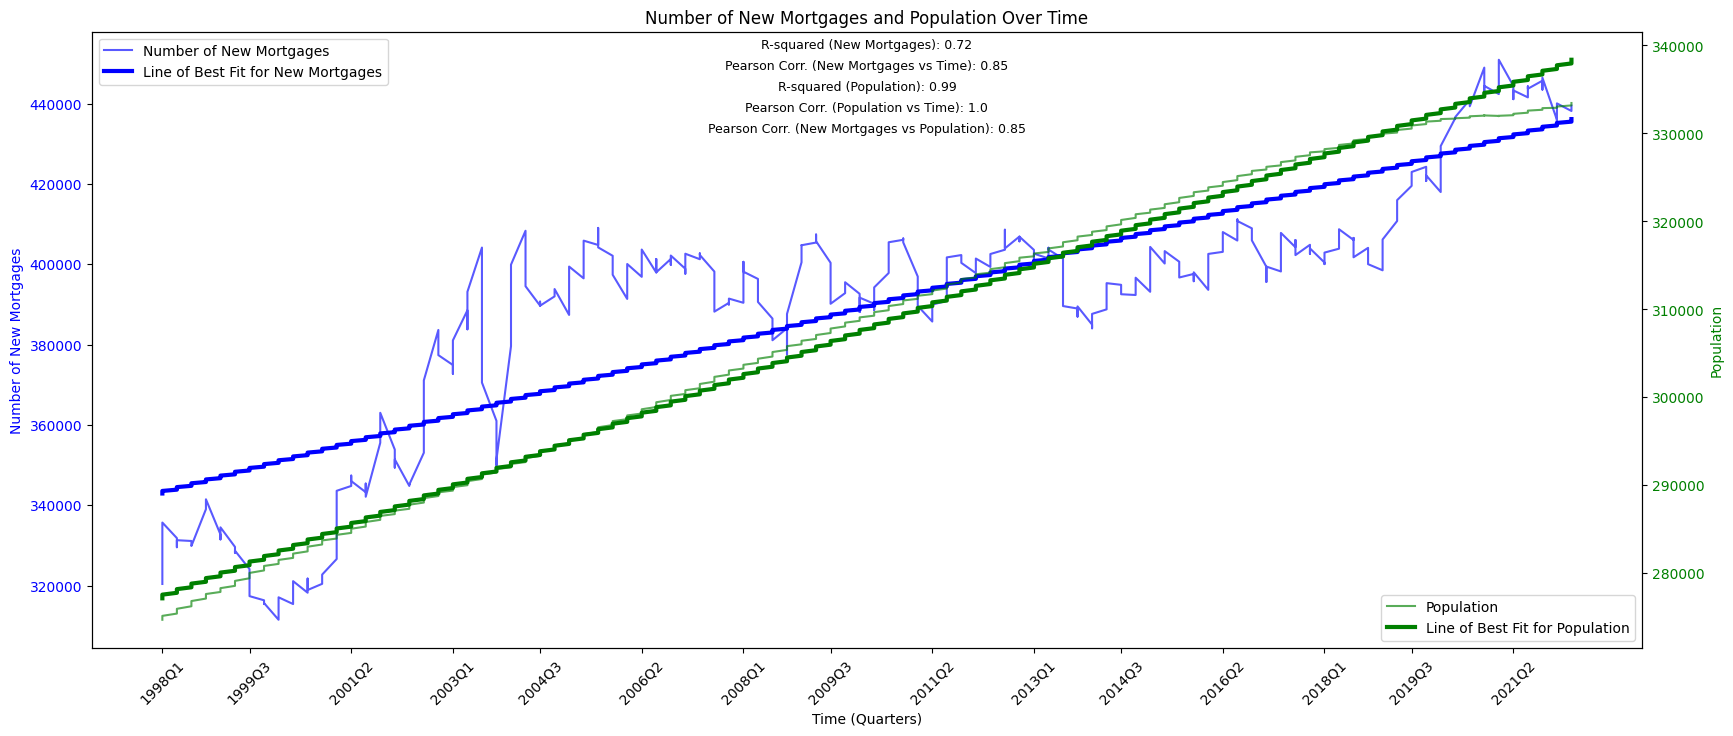

In [13]:
df = concat(
    './data/raw/POPTHM.csv',
    './data/raw/new_morgages.csv')

# Convert the 'DATE' column to pandas datetime
df['DATE'] = df.index
df['Quarter'] = df['DATE'].dt.to_period("Q")
df.head().to_clipboard()

# Extract columns
num_morgages = df['NUMMORGAGES']
population = df['POPTHM']

# Line of best fit
x = np.arange(len(num_morgages))
z1 = np.polyfit(x, num_morgages, 1)
z2 = np.polyfit(x, population, 1)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)

# Create the figure and the first axis
fig, ax1 = plt.subplots()
ax1.plot(df['Quarter'].astype(str), num_morgages, label='Number of New Mortgages', alpha=0.65, color='b')
ax1.plot(df['Quarter'].astype(str), p1(x), "b", linewidth=3, label='Line of Best Fit for New Mortgages')
ax1.set_xlabel('Time (Quarters)')
ax1.set_ylabel('Number of New Mortgages', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.legend(loc='upper left')

# Create the twin axis
ax2 = ax1.twinx()
ax2.plot(df['Quarter'].astype(str), population, label='Population', alpha=0.65, color='g')
ax2.plot(df['Quarter'].astype(str), p2(x), "g",linewidth=3, label='Line of Best Fit for Population')
ax2.set_ylabel('Population', color='g')
ax2.tick_params(axis='y', labelcolor='g')
plt.legend(loc='lower right')

# Set the title
plt.title('Number of New Mortgages and Population Over Time')
fig.set_size_inches(20, 8)

# Selecting subset of date labels
n = 20  # Choose every nth label
ax1.set_xticks(df['Quarter'].astype(str)[::n])
ax1.tick_params(axis='x', rotation=45)

# Calculate and display coefficients on the plot
r_squared_num_morgages = round(np.corrcoef(x, num_morgages)[0, 1] ** 2, 2)
r_squared_population = round(np.corrcoef(x, population)[0, 1] ** 2, 2)
pearson_corr_num_morgages_time = round(np.corrcoef(x, num_morgages)[0, 1], 2)
pearson_corr_population_time = round(np.corrcoef(x, population)[0, 1], 2)
pearson_corr_num_morgages_population = round(np.corrcoef(num_morgages, population)[0, 1], 2)

annotations = [
    f'R-squared (New Mortgages): {r_squared_num_morgages}',
    f'Pearson Corr. (New Mortgages vs Time): {pearson_corr_num_morgages_time}',
    f'R-squared (Population): {r_squared_population}',
    f'Pearson Corr. (Population vs Time): {pearson_corr_population_time}',
    f'Pearson Corr. (New Mortgages vs Population): {pearson_corr_num_morgages_population}',
]

for i, annotation in enumerate(annotations):
    plt.annotate(annotation, xy=(0.5, 1), xytext=(0, -5 - 15 * i), fontsize=9,
                 xycoords='axes fraction', textcoords='offset points',
                 ha='center', va='top')

plt.show()

PERCENT AVARAGE FAMILY SPENDS MONTHLY ON THERE MORGAGE

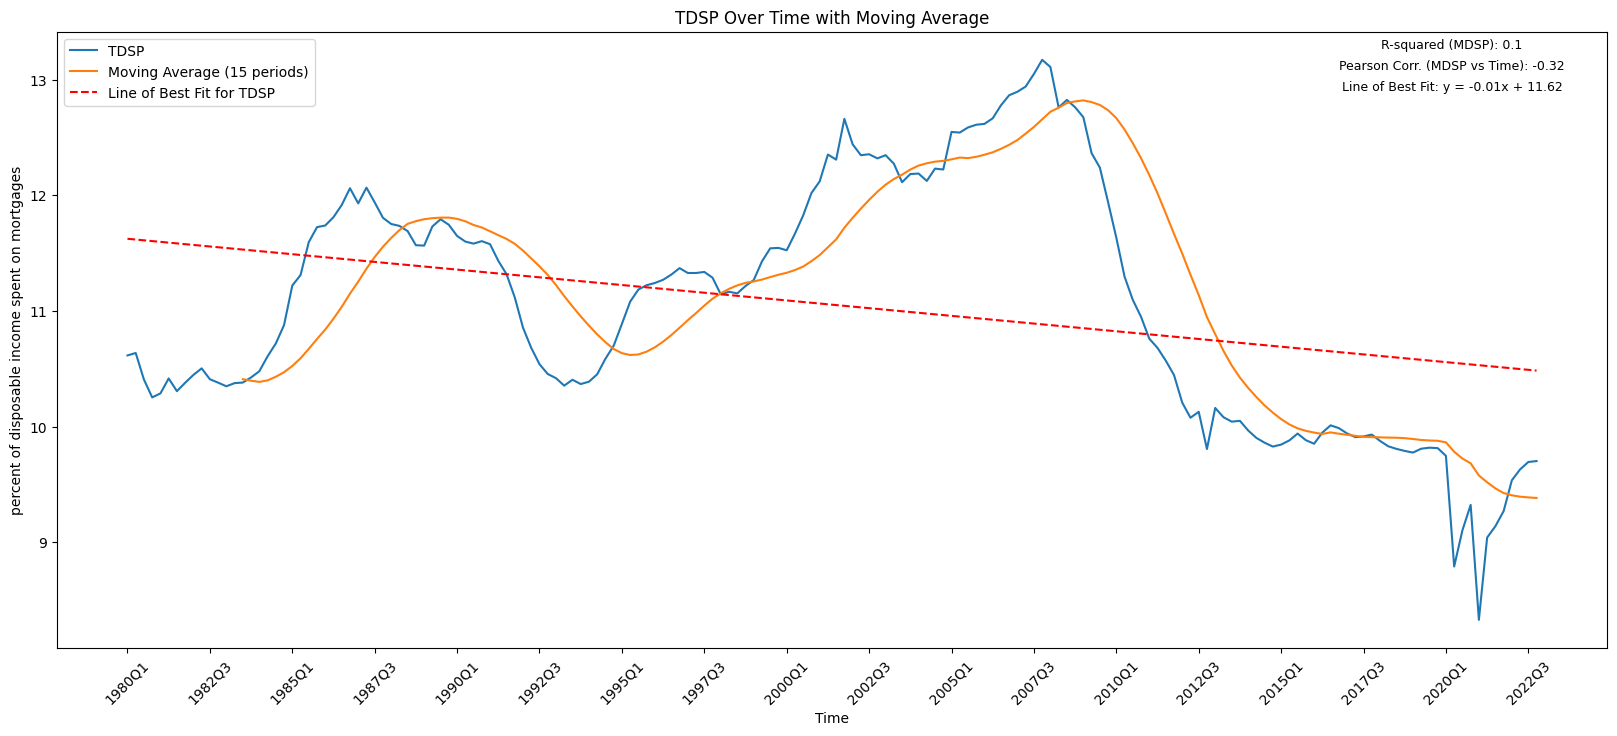

In [14]:
info = concat('./data/raw/TDSP.csv')

# Convert the 'DATE' column to pandas datetime
info['DATE'] = info.index

# Convert the date to year-quarter format
info['Quarter'] = info['DATE'].dt.to_period("Q")

mdsp = info['TDSP']
mdsp.head().to_clipboard()

# Compute the moving average with window size of 4
moving_average = mdsp.rolling(window=15).mean()

# Line of best fit
x = np.arange(len(mdsp))
z = np.polyfit(x, mdsp, 1)
p = np.poly1d(z)

# Plotting the data
plt.plot(info['Quarter'].astype(str), mdsp, label='TDSP')
plt.plot(info['Quarter'].astype(str), moving_average, label='Moving Average (15 periods)')
plt.plot(info['Quarter'].astype(str), p(x), "r--", label='Line of Best Fit for TDSP')

plt.xlabel('Time')
plt.ylabel('percent of disposable income spent on mortgages')
plt.title('TDSP Over Time with Moving Average')
plt.legend(loc='upper left')
plt.gcf().set_size_inches(20, 8)

# Selecting subset of date labels
n = 10  # Choose every nth label (you can change n to create desired spacing)
plt.xticks(info['Quarter'].astype(str)[::n], rotation=45)

# Calculate and display coefficients on the plot
r_squared_mdsp = round(np.corrcoef(x, mdsp)[0, 1] ** 2, 2)
pearson_corr_mdsp_time = round(np.corrcoef(x, mdsp)[0, 1], 2)
slope, intercept = z

# Using annotation to display centered text at the top of the plot
annotations = [
    f'R-squared (MDSP): {r_squared_mdsp}',
    f'Pearson Corr. (MDSP vs Time): {pearson_corr_mdsp_time}',
    f'Line of Best Fit: y = {round(slope, 2)}x + {round(intercept, 2)}'
]

for i, annotation in enumerate(annotations):
    plt.annotate(annotation, xy=(0.9, 1), xytext=(0, -5 - 15 * i), fontsize=9,
                 xycoords='axes fraction', textcoords='offset points',
                 ha='center', va='top')

plt.show()

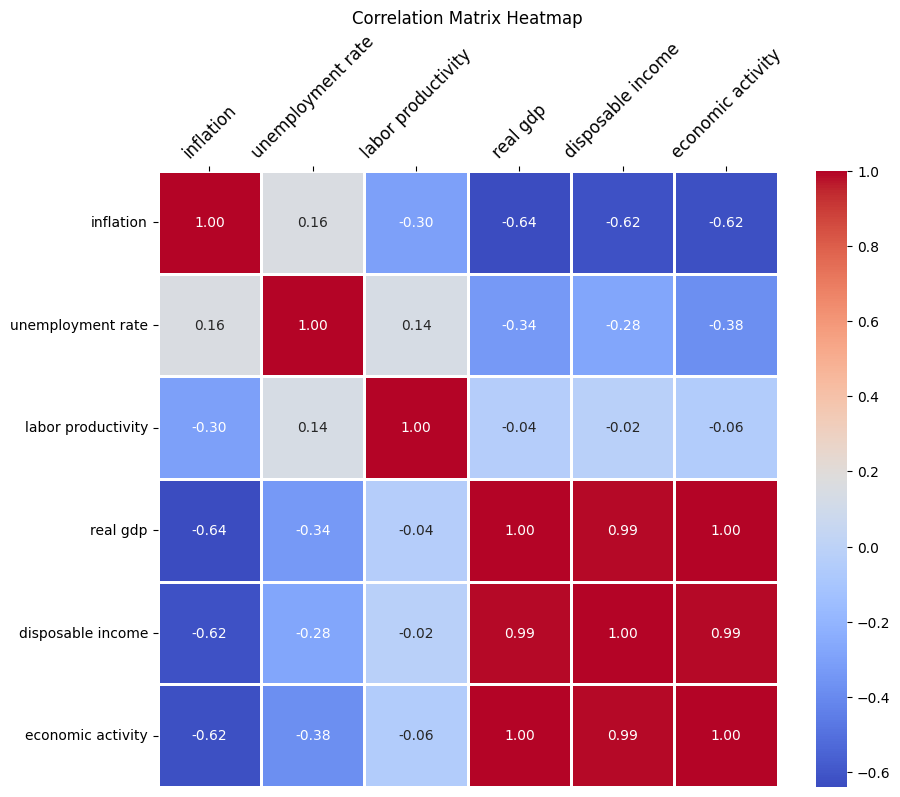

In [16]:
data = concat(
    './data/raw/PCETRIM12M159SFRBDAL.csv', # inflation                         
    './data/raw/UNRATE.csv',               # unemployment rate                 
    './data/raw/PRS84006091.csv',          # labor productivity                
    './data/raw/GDPC1.csv',                # real GDP(gross domestic product)  
    './data/raw/DSPIC96.csv',              # disposable income                 
    './data/raw/USPHCI.csv',               # economic activity                 
)

data.head().to_clipboard()
# Rename columns
data.columns = ['inflation', 'unemployment rate', 'labor productivity', 'real gdp', 'disposable income', 'economic activity']

# Calculate correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, ax=ax)
ax.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)
plt.title('Correlation Matrix Heatmap')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Enlarge x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Move the x-axis labels to top
ax.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)

# Set title for the heatmap
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()